In [1]:
import random, pylab, math
import numpy as np
import matplotlib.pyplot as plt

# Lecture 1: Introduction to Monte-Carlo Algorithm

Derive a crucial theorem about the convergence of Monte Carlo algorithms using 3x3 pebble game. 

## 1. Direct Sampling
Throw pebbles randomly into the square. Each pebble inside the square counts as a 'trial', and each pebble inside the circle counts as a 'hit'. It can be used to compute the number 'Pi'.[Fig. 1]
$$
\frac{A_{circule}}{A_{square}}=\frac{\pi}{4} \hskip2mm \Longrightarrow \hskip2mm \pi=4\cdot\frac{A_{circle}}{A_{square}} \approx 4\cdot\frac{N_{hits}}{N_{trial}}
$$
This process expressed in Python:
#### direct_pi.py

In [1]:
n_trials = 4000
n_hits = 0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0) 
    if x**2 + y**2 < 1.0: 
        n_hits += 1
print (4.0 * n_hits / float(n_trials))

3.159


\
To do many runs, we wrap up the above block to a function and excute it for many times: 
#### direct_pi_multirun.py

In [10]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits
 
n_runs = 1000
n_trials = 4000
for run in range(n_runs):
    print ( 4.0 * direct_pi(n_trials) / float(n_trials) )

## 2. Metropolis Algorithm

Imagine that if the area of the square is so large that no one can throw a pebble randomly into such a big field. The algorithm may be modified:

<img src="./modified_algorithm.png" width = "200" height = "100" alt="modified_algorithm.png" align=center />

In [12]:
#![jupyter](./modified_algorithm.png)

Start with the upper right corner, throw the pebble in a random direction, and restart a new throw at the dropping position. \
Note that we have to cope with the unexpected miss that we throw the pebble outside of the square. The solution is to refuse this throw and do a new throw again until it drops inside the square. Of course, we should count +1 here for one throw. 

There are only one pebble in the center of the pad because from the center there are no outfielders thence no rejections. There would be many 'piles' close to the boundaries as this:

<img src="./pile_up.png" width = "200" height = "100" alt="pile_up.png" align=center />

This algorithm is implemented in Python as:

#### markov_pi.py

In [14]:
x, y = 1.0, 1.0
delta = 0.1
n_trials = 4000
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 < 1.0: n_hits += 1
print ( 4.0 * n_hits / float(n_trials) )

3.215


#### markov_pi_multiruns.py

In [17]:
def markov_pi(N, delta): 
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

n_runs = 1000
n_trials = 4000
delta = 0.1
for run in range(n_runs):
    print ( 4.0 * markov_pi(n_trials, delta) / float(n_trials))

## 3. 3x3 Pebble Game: Detailed Balance

To explain why the 'pile-up' is reasonable, we condiser the 3x3 pebble game, which is equivalent but a simpler version:

<img src="./3by3_pebble.png" width = "200" height = "100" alt="3by3_pebble.png" align=center />
 
 

 \
Probability of configuration 'a','b','c'...: $\pi_{a}, \pi_{b}, \pi_{c}...$\
Probability of transition: $p(c\rightarrow a), p(b\rightarrow a), p(a\rightarrow a)$

 \
 \
Equations: 
$$
\begin{align}
\pi_{a} &= \pi_{a}p(a\rightarrow a)+\pi_{b}p(b\rightarrow a)+\pi_{c}p(c\rightarrow a)\\
1 &= p(a\rightarrow a)+p(b\rightarrow a)+p(c\rightarrow a)
\end{align}
$$
Combine these two, we find the necessary and sufficient condition for Monte-Carlo algorithm, called '**Celebrated Global Balance Condition**':
$$
\pi_{a}p(a\rightarrow b)+\pi_{a}p(a\rightarrow c)=\pi_{b}p(b\rightarrow a)+\pi_{c}p(c\rightarrow a)
$$
A set of transition probabilities from one site to another must satisfy it. 

A special way of satisfying this condition is make two of them equal seperately, which is the sufficient condition for Monte-Carlo algorithm, called the **'Detailed Balance Condition'**:
$$
\pi_{a}p(a\rightarrow b)=\pi_{b}p(b\rightarrow a)\\
\pi_{a}p(a\rightarrow c)=\pi_{c}p(c\rightarrow a)
$$

 
 \
In the 3x3 pebble game, if we demand the 9 configurations to be sweept out evenly. Namely, $\pi_{a}=\pi_{b}=\pi_{c}=...$\
The **Detailed Balance Condition** is reduced to: 
$$
p(a\rightarrow b)=p(b\rightarrow a)\\
p(a\rightarrow c)=p(c\rightarrow a)
$$

We will play this homogeneous 3x3 pebble game in the first part of Tutorial 1.

Next, the statistical weights of configurations are just trivial (unnormalized).

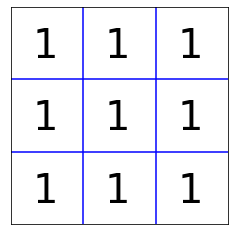

In [69]:
pylab.plot([0.5, 3.5], [1.5, 1.5], 'b')
pylab.plot([0.5, 3.5], [2.5, 2.5], 'b')
pylab.plot([1.5, 1.5], [0.5, 3.5], 'b')
pylab.plot([2.5, 2.5], [0.5, 3.5], 'b')
pylab.text(0.8, 0.8, '1', fontsize=40)
pylab.text(0.8, 1.8, '1', fontsize=40)
pylab.text(0.8, 2.8, '1', fontsize=40)
pylab.text(1.8, 0.8, '1', fontsize=40)
pylab.text(1.8, 1.8, '1', fontsize=40)
pylab.text(1.8, 2.8, '1', fontsize=40)
pylab.text(2.8, 0.8, '1', fontsize=40)
pylab.text(2.8, 1.8, '1', fontsize=40)
pylab.text(2.8, 2.8, '1', fontsize=40)
pylab.axis('scaled')
pylab.axis([0.5, 3.5, 0.5, 3.5])
pylab.xticks([])
pylab.yticks([])
pylab.show()

## 4. The inhomogeneous pebble game and the metropolis algorithm

Assume that the statistical weights of configuration are: 

<img src="./inhomogeneous_pebble.png" width = "200" height = "150" alt="inhomogeneous_pebble.png" align=center />

This statistical distribution set a game environment for us. In the inhomeneous pebble game, we still have to devise a Markov Chain Monte Carlo (MCMC) algorithm obeying the **Detailed Balance Conditon**. 

Due to non-even configuration here, the transition probability matrix cannot be set sysmmetrically, namely:
$p(a\rightarrow b)\neq p(b\rightarrow a)$

A new way to set transition probability is derived by Metropolis et al. in 1953. 

**Metrololis Acceptance Probability**: $p(a\rightarrow b)=min(1, \frac{\pi_{a}}{\pi_{b}})$

This rule will not violate **Detailed Balance Conditon**. In addition, think about the transition between a low energy state and high energy state.



#### pebble_basic_inhomogeneous

In [31]:
histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = 8
n_iter = 1000000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1 

norm = sum(weight)
print('comparison:  weight, histogram')
for k in range(9): 
    print('site: ', k,' weight: ', weight[k], ' histo: ', norm * histo[k] / float(n_iter))

comparison:  weight, histogram
site:  0  weight:  3.0  histo:  2.99429
site:  1  weight:  0.5  histo:  0.50029
site:  2  weight:  1.0  histo:  1.00381
site:  3  weight:  0.5  histo:  0.50258
site:  4  weight:  1.0  histo:  1.00739
site:  5  weight:  0.5  histo:  0.50012
site:  6  weight:  2.0  histo:  1.99784
site:  7  weight:  0.5  histo:  0.50416
site:  8  weight:  1.0  histo:  0.98952


# Tutorial 1: Exponential convergence and the 3x3 pebble game

The convergence of MCMC algorithm is exponential: $e^{-t/\tau}$, which shows that the MCMC algorithm is characterized by the convergence time scale $\tau$. It is on this scale that the system approach equilibirum. 

For the pebble game problem, the pebble positions become equally probable after time $\tau$. Another example is the half-decay of radioactive element. 


Let us simulate the pebble game. Start with the topright site '8', and analyze two questions as dessert. 

<img src="./pebble_game.png" width = "200" height = "150" alt="pebble_game.png" align=center />

1) If the pebble is on site 8 at t=0, on which sites can it be at t=1?\
Ans: 5, 7, 8; with probability $p=\frac{1}{4}$, $p=\frac{1}{4}$, $p=\frac{1}{2}$, respectively\
2) At what time does the probability to be at site zero become nonzero?\
Ans: t=4s and larger\
3) What is the probability fro the pebble to be on site 0 at time t=4, given that it started on site 8 at time t=0?\
Ans: $p=\frac{6}{256}$

The following program shows movements of pebble:
#### pebble_basic.py

In [30]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
t_max = 4
site = 8
t = 0
print(site)
while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0, 3)]   # 0-right, 1-up, 2-left, 3-down
    print(site)

#### pebble_basic_movie.py

In [ ]:
sigma = 0.4  # sigma and s_map are needed for the graphical output
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
site = 8
N_runs = 2
for run in range(N_runs):
    if run < 10: number_string = '0'+str(run)
    else: number_string = str(run)
    # Begin of graphical output
    cir = pylab.Circle(s_map[site], radius=sigma, fc='r')
    pylab.gca().add_patch(cir)
    pylab.plot([0.5, 3.5], [1.5, 1.5], 'b')
    pylab.plot([0.5, 3.5], [2.5, 2.5], 'b')
    pylab.plot([1.5, 1.5], [0.5, 3.5], 'b')
    pylab.plot([2.5, 2.5], [0.5, 3.5], 'b')
    pylab.title('t = '+ number_string)
    pylab.axis('scaled')
    pylab.axis([0.5, 3.5, 0.5, 3.5])
    pylab.xticks([])
    pylab.yticks([])
    #pylab.savefig('pebble_basic_movie_'+number_string+'.png', transparent=False)
    pylab.show()
    pylab.clf()
    # End of graphical output
    site = neighbor[site][ random.randint(0, 3)]

#### pebble_basic_multirun.py

In [18]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
t_max = 4
N_runs = 25600
site_lst = []
for run in range(N_runs):
    site = 8
    t = 0
    while t < t_max: 
        t += 1
        site = neighbor[site][random.randint(0, 3)]
    #print(site)
    site_lst.append(site)
#print(site_lst)

#### pebble_multirun_all_histogram.py

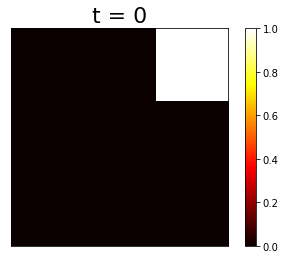

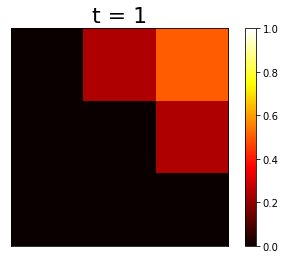

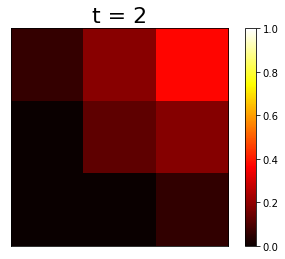

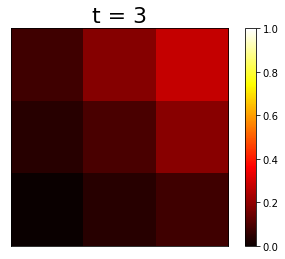

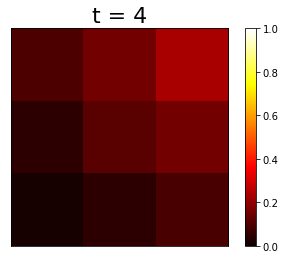

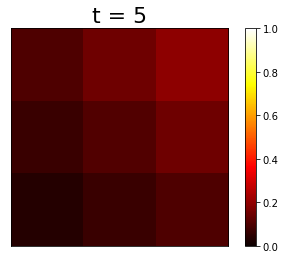

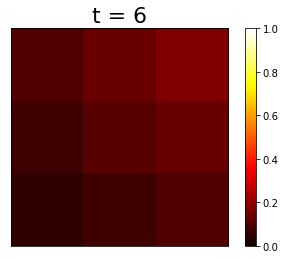

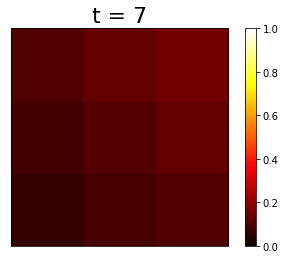

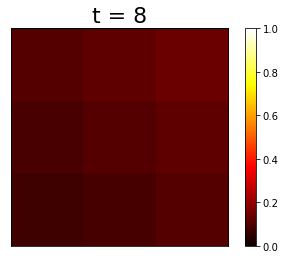

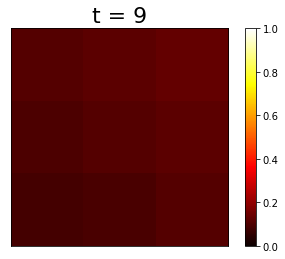

In [21]:
xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 

neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}

N_runs = 10
for run in range(N_runs):
    list_vec = []
    if run < 10:  run_str= '0'+str(run)
    else: run_str = str(run)
    for n_runs in range(100000): 
        pos = 9
        for iter in range(run):
            pos = neighbor[pos][ random.randint(0, 3)]
        list_vec.append(pos)

    x = [xvec[k] for k in list_vec]
    y = [yvec[k] for k in list_vec]

    plt.xticks([])
    plt.yticks([])
    H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
               range=[[1,3],[1,3]], normed=True)
    #print(H)
    H /= np.sum(H)
    #print(H)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    histo = plt.imshow(H, extent=extent, interpolation='nearest', vmin=0, vmax=1.00)
    histo.set_cmap('hot')
    plt.colorbar()
    plt.title('t = '+str(run),fontsize=22)
    #plt.savefig('3x3_pebble_run_'+run_str+'.png')
    plt.show()
    plt.close()

The first \
The color becomes more and more uniform. 

Question: Would our results change if instead of playing 100,000 consecutive pebble games, we would let 100,000 pebbles move across the grid at the same time? \
Ans: No

## 2. The Transfer Matrix Method
Solve the pebble game problem exactly.

Note that it doews not apply for large system. Define the probability vector: 

$$
\pi_{t}=
\left(\begin{matrix}
\pi_{0}^{t}\\
\pi_{1}^{t}\\
\pi_{2}^{t}\\
\pi_{3}^{t}\\
\vdots\\
\pi_{7}^{t}\\
\pi_{8}^{t}\\
\end{matrix}\right)
$$

As discussed in the Lecture, the Monte-Carlo is nothing but the transfer matrix of transition probabilities $p(a\rightarrow b)$. For 3x3 pebble game, the transfer matrix is:

$$
P=\left(\begin{matrix}
p(0\rightarrow 0) & p(1\rightarrow 0) & \cdots & p(8\rightarrow 0)\\
p(0\rightarrow 1) & p(1\rightarrow 1) & \cdots & p(8\rightarrow 1)\\
p(0\rightarrow 2) & p(1\rightarrow 2) & \cdots & p(8\rightarrow 2)\\
\vdots &  &  & \vdots\\
p(0\rightarrow 8) & p(1\rightarrow 0) & \cdots & p(8\rightarrow 8)\\
\end{matrix}\right)
$$

The probability vector at t+1 is:  

$$
\Pi_{t+1}=
\left(\begin{matrix}
\pi_{0}^{t+1}\\
\pi_{1}^{t+1}\\
\pi_{2}^{t+1}\\
\vdots\\
\pi_{8}^{t+1}\\
\end{matrix}\right)=
\left(\begin{matrix}
p(0\rightarrow 0) & p(1\rightarrow 0) & \cdots & p(8\rightarrow 0)\\
p(0\rightarrow 1) & p(1\rightarrow 1) & \cdots & p(8\rightarrow 1)\\
p(0\rightarrow 2) & p(1\rightarrow 2) & \cdots & p(8\rightarrow 2)\\
\vdots &  &  & \vdots\\
p(0\rightarrow 8) & p(1\rightarrow 0) & \cdots & p(8\rightarrow 8)\\
\end{matrix}\right)
\left(\begin{matrix}
\pi_{0}^{t}\\
\pi_{1}^{t}\\
\pi_{2}^{t}\\
\vdots\\
\pi_{8}^{t}\\
\end{matrix}\right)
$$

In Python, time-evolution of probability vector was given:
#### pebble_transfer.py

In [ ]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = np.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = np.zeros(9)
position[8] = 1.0
for t in range(100):
    print (t,'  ',["%0.5f" % i for i in position])
    position = np.dot(transfer, position)

The equilibrium is reached very fast, at t=38. The results shows that the equilibrium probability vector, [0.1111, 0.111, ... ,0.111], is an eigenvector of the transfer matrix with eigenvalue 1. 


#### pebble_transfer_eigen.py

In [24]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = np.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
eigenvalues, eigenvectors = np.linalg.eig(transfer)
print(eigenvalues)
 
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(9):
#    print eigenvalues[iter]
#    for i in range(9):
#       print eigenvectors[i][iter]

[-5.00000000e-01  1.00000000e+00  7.50000000e-01 -1.29713170e-16
  5.00000000e-01  2.50000000e-01  7.50000000e-01  6.67868538e-17
  2.50000000e-01]


Next, we subtract the initial probability state by 1/9 and take the absolute value. This aims to do linear fitting and determine the convergence relationship. Note that it is equivalent to starting from the probability state: [0.1111, 0.1111, ....., 0.11111, 0.8889]. As implemented in Python:

#### pebble_transfer_sub.py

In [50]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = np.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = np.zeros(9)
position[8] = 1.0
position_0 = []
for t in range(100):
    print (t,'  ',["%0.5f" % abs(i- 1.0 / 9.0) for i in position])
    position_0.append(abs(position[0]-1.0/9.0))
    position = np.dot(transfer, position)

0    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.88889']
1    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.13889', '0.11111', '0.13889', '0.38889']
2    ['0.11111', '0.11111', '0.04861', '0.11111', '0.01389', '0.07639', '0.04861', '0.07639', '0.26389']
3    ['0.11111', '0.06424', '0.03299', '0.06424', '0.01736', '0.07639', '0.03299', '0.07639', '0.17014']
4    ['0.08767', '0.05642', '0.01345', '0.05642', '0.00608', '0.04905', '0.01345', '0.04905', '0.12326']
5    ['0.07205', '0.03787', '0.00857', '0.03787', '0.00369', '0.04123', '0.00857', '0.04123', '0.08615']
6    ['0.05496', '0.03054', '0.00345', '0.03054', '0.00168', '0.02878', '0.00345', '0.02878', '0.06369']
7    ['0.04275', '0.02182', '0.00216', '0.02182', '0.00088', '0.02268', '0.00216', '0.02268', '0.04624']
8    ['0.03228', '0.01690', '0.00087', '0.01690', '0.00043', '0.01647', '0.00087', '0.01647', '0.03446']
9    ['0.02459', '0.01241', '0.00054', '0.01241', '0.00

 \
Now let us plot the output for site zero in the semi-log scale. 
$$
p_{0}(t)=p_{0}(0) \hskip1mm exp(-t/\tau), \hskip6mm ln(\frac{p}{0.1111})=-t/\tau
$$


This straight line with slope 0.75 indicates the exponential convergence of the equilibirum. 

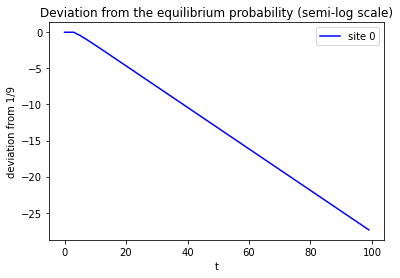

4.7193471228168526e-08


In [51]:
position_0_array = np.array(position_0)
plt.plot(range(100), np.log(position_0_array/(1/9)), label='site 0', color='b')
plt.xlabel('t')
plt.ylabel('deviation from 1/9')
plt.title('Deviation from the equilibrium probability (semi-log scale)')
plt.legend(loc='best')
plt.text(50, -5, ''.format(position_0[50]-position_0[51]))
plt.show()
print(position_0_array[50]-position_0_array[51])

$(0.75)^{t}=exp(t \cdot ln(0.75))=exp(-t/\tau)$\
with $\tau=3.476...$

## 3. Irreducibility and Aperiodicity in the Markov Chain

The results implies that the evolution of the Monte Carlo dynamics is determined by the decomposition of the probability vector at initial time into the eigenvectors of the transfer matrix. All eigenvalues have modulus less than or equal to one. An eigenvalue larger than one will lead to an explosion of the probability at large times,

Probability vector \
$p^{t}=\lambda^{t}_{1}v_{1}+\lambda^{t}_{2}v_{2}+.....=\sum_{i}\lambda^{t}_{i}v_{i}$ 


#### pebble_dual_eigen.py

In [54]:
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = np.zeros((18, 18))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25     # red pebble game
        transfer[neighbor[k][neigh]+9, k+9] += 0.25 # blue pebble game   
# small transition epsilon between red 2 and blue 6
epsilon = 0.04
transfer[6+9,2] = transfer[2,6+9] = epsilon
transfer[2,2] -= epsilon
transfer[6+9,6+9] -= epsilon
eigenvalues, eigenvectors = np.linalg.eig(transfer)
print(eigenvalues)
 
# you may print the eigenvectors by uncommenting the following four lines
#for iter in range(18):
#    print eigenvalues[iter]
#    for i in range(18):
#        print eigenvectors[i][iter]

[-5.02430015e-01 -5.00000000e-01  1.00000000e+00  9.92451031e-01
  5.00000000e-01  4.79023434e-01  7.25649298e-01 -1.50050555e-02
  2.40311308e-01 -5.75591118e-17  7.50000000e-01  7.50000000e-01
  7.50000000e-01  2.24796422e-16  2.63649218e-17  2.50000000e-01
  2.50000000e-01  2.50000000e-01]


#### pebble_dual_movie.py

In [61]:
random.seed('1234')
sigma = 0.4
epsilon = 0.4  # probability to switch from red to blue pebble, and vice versa
pylab.figure()
s_map_red =  [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
              (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
              (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 
offset = 3.0
s_map_blue = [(x+offset,y-offset) for (x,y) in s_map_red]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
color = 'red'  #chose 'red' or 'blue'
site = 8
tmax = 240
for iter in range(tmax):
    period = 4
    if (iter%period) == 0:
    # Begin of graphical output
        maxlength = len(str(tmax-1))
        number_string = str(iter).zfill(maxlength)
        if color == 'red':  cir = pylab.Circle(s_map_red[site],  radius=sigma, fc='r')
        if color == 'blue': cir = pylab.Circle(s_map_blue[site], radius=sigma, fc='b')
        
        pylab.figure()
        pylab.gca().add_patch(cir)
        pylab.plot([0.5, 3.5], [0.5, 0.5], 'r')
        pylab.plot([0.5, 3.5], [1.5, 1.5], 'r')
        pylab.plot([0.5, 3.5], [2.5, 2.5], 'r')
        pylab.plot([1.5, 1.5], [0.5, 3.5], 'r')
        pylab.plot([2.5, 2.5], [0.5, 3.5], 'r')
        pylab.plot([3.5, 3.5], [0.5, 3.5], 'r')
        pylab.plot([0.5+offset, 3.5+offset], [1.5-offset, 1.5-offset], 'b')
        pylab.plot([0.5+offset, 3.5+offset], [2.5-offset, 2.5-offset], 'b')
        pylab.plot([0.5+offset, 3.5+offset], [3.5-offset, 3.5-offset], 'b')
        pylab.plot([0.5+offset, 0.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.plot([1.5+offset, 1.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.plot([2.5+offset, 2.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.title('t = '+ number_string)
        pylab.axis('scaled')
        pylab.axis([0.5, 6.5, -2.5, 3.5])
        pylab.xticks([])
        pylab.yticks([])
        number_string_filename = str(iter/period).zfill(3)
        #pylab.savefig('pebble_dual_movie_epsilon_'+number_string_filename+'.png', transparent=True)
        pylab.clf()
        pylab.close()
    # End of graphical output
    newsite = neighbor[site][ random.randint(0, 3)]
    newcolor = color
    if (color == 'red') and (site == 2) and (newsite == 2):
        if random.random() < epsilon:
            newcolor = 'blue'
            newsite = 6
            print("transition red->blue at time = ", iter)
    if (color == 'blue') and (site == 6) and (newsite == 6):
        if random.random() < epsilon:
            newcolor = 'red'
            newsite = 2
            print("transition blue->red at time = ", iter)
    site = newsite
    color = newcolor

transition red->blue at time =  5
transition blue->red at time =  6
transition red->blue at time =  9
transition blue->red at time =  12
transition red->blue at time =  17
transition blue->red at time =  20
transition red->blue at time =  63
transition blue->red at time =  68
transition red->blue at time =  72
transition blue->red at time =  221


<Figure size 432x288 with 0 Axes>